
Ant path: [0, 9], Number of hops: 1, Remaining energy: [100 100 100 100 100 100 100 100 100  90]


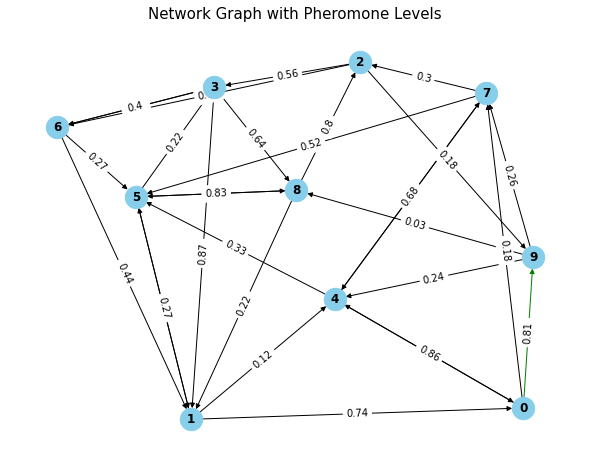


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [100 100 100 100 100 100 100 100 100  90]

Ant path: [0, 7, 4, 0, 4, 0, 9], Number of hops: 6, Remaining energy: [ 81 100 100 100  81 100 100  90 100  81]


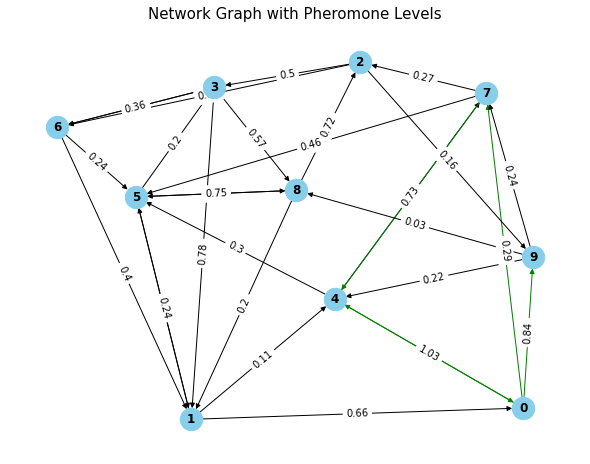


Hop Count: 6
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 0', '0 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [ 81 100 100 100  81 100 100  90 100  81]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [ 81 100 100 100  81 100 100  90 100  72]


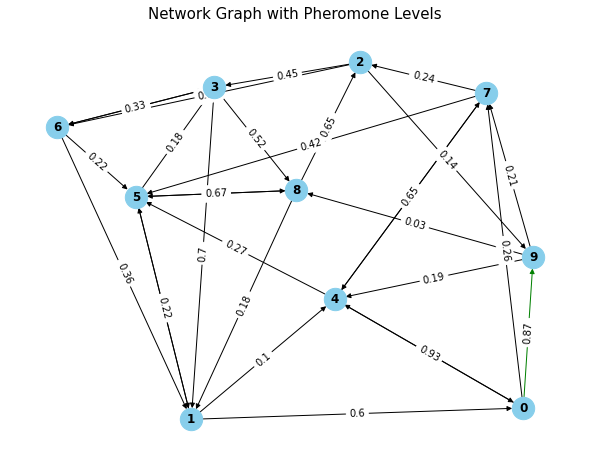


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [ 81 100 100 100  81 100 100  90 100  72]

Ant path: [0, 7, 4, 0, 9], Number of hops: 4, Remaining energy: [ 72 100 100 100  72 100 100  81 100  64]


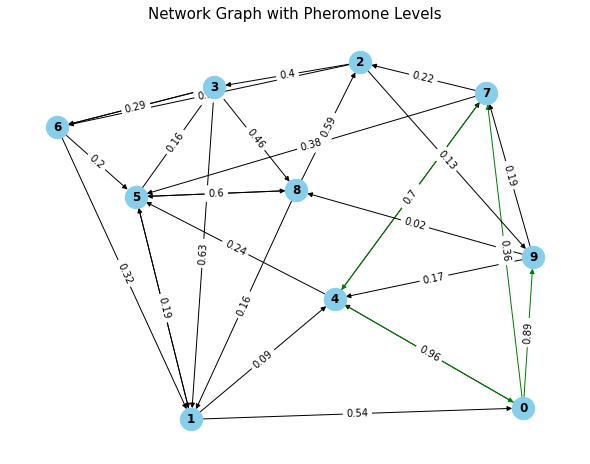


Hop Count: 4
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [ 72 100 100 100  72 100 100  81 100  64]

Ant path: [0, 7, 4, 0, 9], Number of hops: 4, Remaining energy: [ 64 100 100 100  64 100 100  72 100  57]


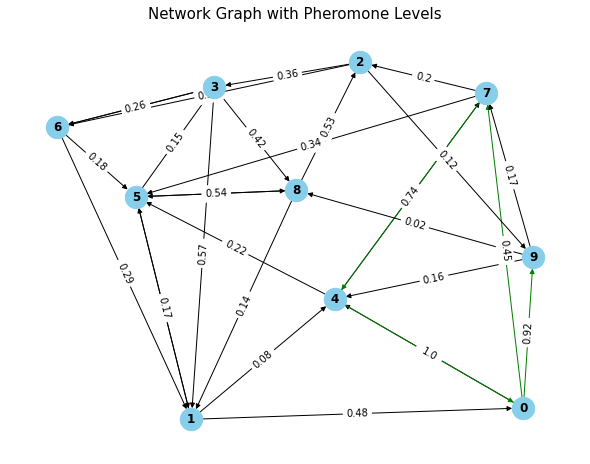


Hop Count: 4
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [ 64 100 100 100  64 100 100  72 100  57]

Ant path: [0, 7, 5, 8, 2, 6, 3, 1, 0, 7, 4, 0, 9], Number of hops: 12, Remaining energy: [51 90 90 90 57 90 90 57 90 51]


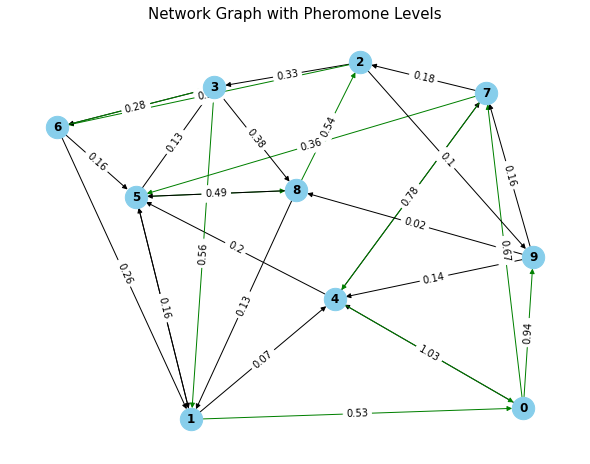


Hop Count: 12
Hopping Nodes: ['0 -> 7', '7 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 3', '3 -> 1', '1 -> 0', '0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [51 90 90 90 57 90 90 57 90 51]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [51 90 90 90 57 90 90 57 90 45]


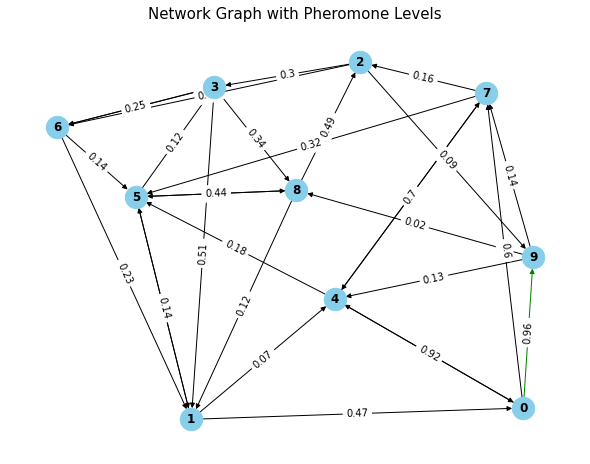


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [51 90 90 90 57 90 90 57 90 45]

Ant path: [0, 7, 4, 0, 9], Number of hops: 4, Remaining energy: [45 90 90 90 51 90 90 51 90 40]


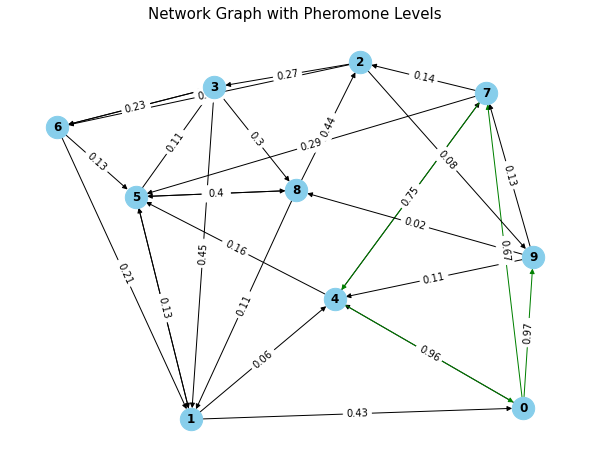


Hop Count: 4
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [45 90 90 90 51 90 90 51 90 40]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [45 90 90 90 51 90 90 51 90 36]


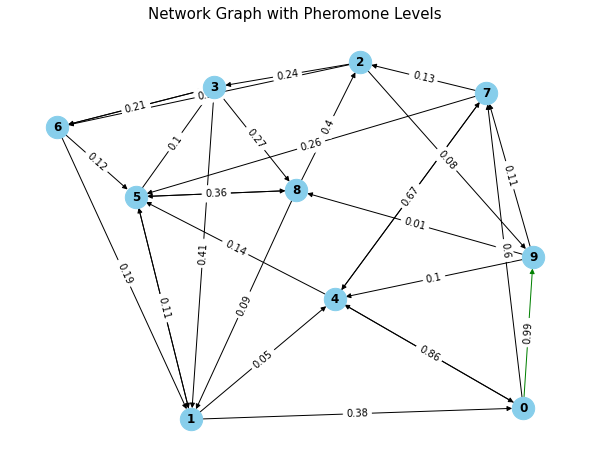


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [45 90 90 90 51 90 90 51 90 36]

Ant path: [0, 7, 2, 6, 3, 1, 0, 7, 4, 0, 7, 2, 6, 5, 8, 2, 6, 5, 8, 2, 6, 1, 5, 8, 5, 8, 2, 3, 6, 5, 3, 8, 1, 0, 7, 4, 0, 9], Number of hops: 37, Remaining energy: [28 64 51 64 40 51 51 32 51 32]


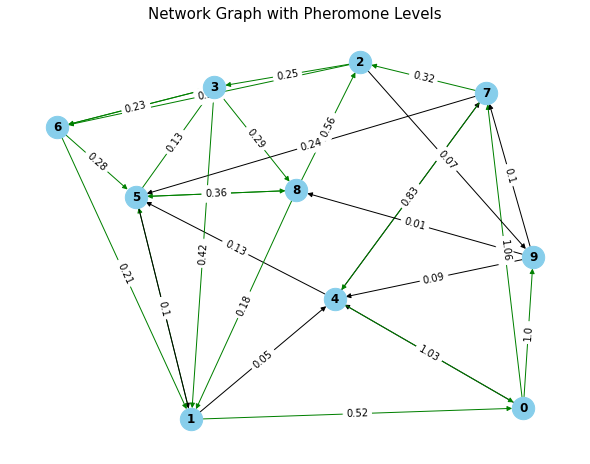


Hop Count: 37
Hopping Nodes: ['0 -> 7', '7 -> 2', '2 -> 6', '6 -> 3', '3 -> 1', '1 -> 0', '0 -> 7', '7 -> 4', '4 -> 0', '0 -> 7', '7 -> 2', '2 -> 6', '6 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 1', '1 -> 5', '5 -> 8', '8 -> 5', '5 -> 8', '8 -> 2', '2 -> 3', '3 -> 6', '6 -> 5', '5 -> 3', '3 -> 8', '8 -> 1', '1 -> 0', '0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [28 64 51 64 40 51 51 32 51 32]


In [110]:
#FINAL STOP HERE



import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of nodes
num_nodes = 10
hop_counts_array_babr = []

# Generate a random network structure excluding direct connection between node 0 and 9
network = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    possible_connections = np.delete(np.arange(num_nodes), i)
    
    # Exclude direct connection between node 0 and 9
    if i == 0:
        possible_connections = np.delete(possible_connections, np.where(possible_connections == 8))
    elif i == 8:
        possible_connections = np.delete(possible_connections, np.where(possible_connections == 0))
    
    # Make connections
    connections = np.random.choice(possible_connections, 3, replace=False)
    
    for conn in connections:
        network[i][conn] = np.random.randint(1, 30) 
        
# Define entry and goal nodes for both algorithms
entry_node = 0
goal_node = num_nodes - 1

# Initialize pheromone levels randomly for both algorithms
pheromone_levels_aco = np.random.rand(num_nodes, num_nodes)
pheromone_levels_eeabr = np.copy(pheromone_levels_aco)

# Parameters for both algorithms
num_ants = 10
evaporation_rate = 0.1
alpha = 1
beta = 2

# Initialize energy levels for nodes with 100 energy for EEABR algorithm
energy_levels_eeabr = np.full(num_nodes, 100)

# Display function for the network and pheromone levels
def display_network_with_pheromones(G, pheromone_levels, path_taken=None):
    for i in range(num_nodes):
        for j in range(num_nodes):
            if network[i][j] > 0:
                edge_color = 'black'
                if path_taken and (i, j) in path_taken:
                    edge_color = 'green'
                G.add_edge(i, j, weight=network[i][j], pheromone=pheromone_levels[i][j], color=edge_color)

    pos = nx.spring_layout(G, seed=42, k=0.5)
    edge_labels = {(i, j): round(G.edges[(i, j)]['pheromone'], 2) for i, j in G.edges()}
    edge_colors = [G.edges[edge]['color'] for edge in G.edges()]
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Network Graph with Pheromone Levels', fontsize=15)
    plt.show()
    
# Display function for hop count, hopping nodes, and energy array
def display_hopcount_and_energy(path, energy_levels):
    num_hops = len(path) - 1
    hop_counts_array_babr.append(num_hops)
    hopping_nodes = [f"{path[i]} -> {path[i+1]}" for i in range(num_hops)]
    
    print("\nHop Count:", num_hops)
    print("Hopping Nodes:", hopping_nodes)
    print("Energy Array:", energy_levels_eeabr)
# Ant Colony Optimization algorithm
def ant_colony_optimization(pheromone_levels):
    global energy_levels_eeabr
    energy_levels_eeabr = np.full(num_nodes, 100)
    
    G_eeabr = nx.DiGraph()
    for _ in range(num_ants):
        current_node = entry_node
        path = [current_node]
        while current_node != goal_node:
            probabilities = np.zeros(num_nodes)
            possible_moves = np.where(network[current_node] > 0)[0]
            valid_moves = [move for move in possible_moves if energy_levels_eeabr[move] <= 100]  # Nodes with energy > 30
            
            
            valid_moves = [move for move in valid_moves if energy_levels_eeabr[move] <= 100]
            
            if not valid_moves:
                break
            
            for move in valid_moves:
                prob = (pheromone_levels[current_node][move] ** alpha) * ((1.0 / network[current_node][move]) ** beta)
                probabilities[move] = prob if prob > 0 else 1e-10
            
            probabilities /= np.sum(probabilities)
            
            if np.isnan(probabilities).any() or np.sum(probabilities) == 0:
                break
            
            next_node = np.random.choice(valid_moves, p=probabilities[valid_moves])
            path.append(next_node)
            energy_levels_eeabr[next_node] *= 0.9
            current_node = next_node
        
        num_hops = len(path) - 1
        
        for i in range(num_hops):
            pheromone_levels[path[i]][path[i+1]] += (1.0 / network[path[i]][path[i+1]])
        
        pheromone_levels *= (1 - evaporation_rate)
        
        print(f"\nAnt path: {path}, Number of hops: {num_hops}, Remaining energy: {energy_levels_eeabr}")
        display_network_with_pheromones(G_eeabr, pheromone_levels, path_taken=[(path[i], path[i+1]) for i in range(num_hops)])
        display_hopcount_and_energy(path, energy_levels_eeabr)
        

# Run both algorithms
ant_colony_optimization(pheromone_levels_aco)


In [114]:

hop_counts_array_babr

[1, 6, 1, 4, 4, 12, 1, 4, 1, 37]


Ant path: [0, 7, 4, 0, 7, 4, 0, 9], Number of hops: 7, Remaining energy: [ 81 100 100 100  81 100 100  81 100  90]


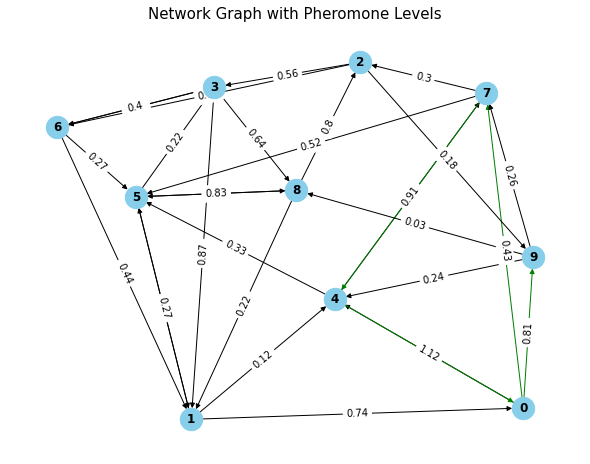


Hop Count: 7
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 0', '0 -> 7', '7 -> 4', '4 -> 0', '0 -> 9']
Energy Array: [ 81 100 100 100  81 100 100  81 100  90]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [ 81 100 100 100  81 100 100  81 100  81]


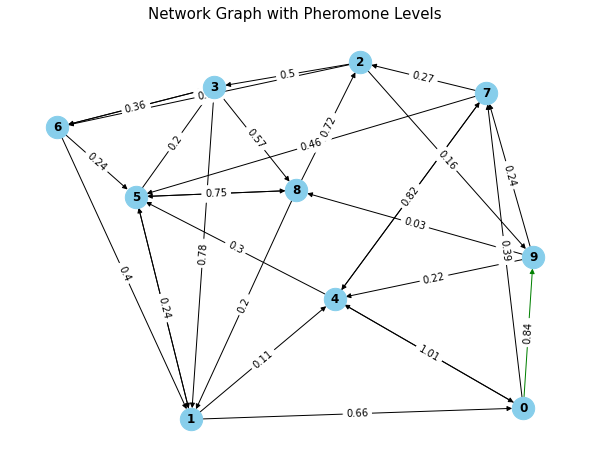


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [ 81 100 100 100  81 100 100  81 100  81]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [ 81 100 100 100  81 100 100  81 100  72]


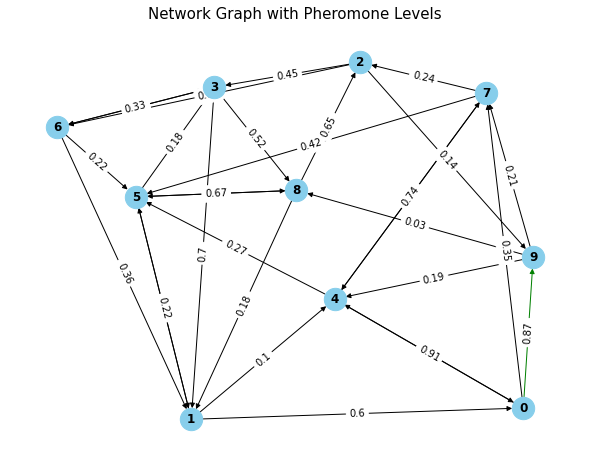


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [ 81 100 100 100  81 100 100  81 100  72]

Ant path: [0, 7, 4, 5, 8, 2, 6, 3, 6, 1, 5, 8, 5, 8, 5, 8, 2, 6, 3, 6, 5, 8, 2, 3, 1, 0, 9], Number of hops: 26, Remaining energy: [72 81 72 72 72 57 64 72 57 64]


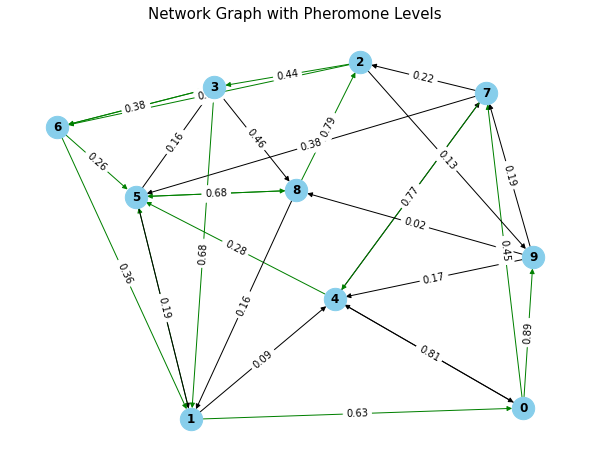


Hop Count: 26
Hopping Nodes: ['0 -> 7', '7 -> 4', '4 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 3', '3 -> 6', '6 -> 1', '1 -> 5', '5 -> 8', '8 -> 5', '5 -> 8', '8 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 3', '3 -> 6', '6 -> 5', '5 -> 8', '8 -> 2', '2 -> 3', '3 -> 1', '1 -> 0', '0 -> 9']
Energy Array: [72 81 72 72 72 57 64 72 57 64]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [72 81 72 72 72 57 64 72 57 57]


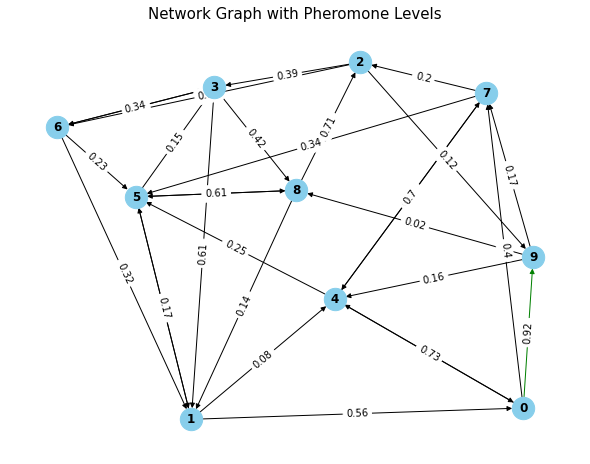


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [72 81 72 72 72 57 64 72 57 57]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [72 81 72 72 72 57 64 72 57 51]


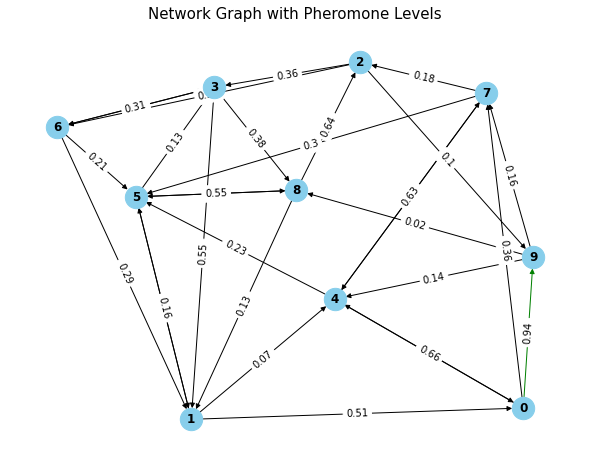


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [72 81 72 72 72 57 64 72 57 51]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [72 81 72 72 72 57 64 72 57 45]


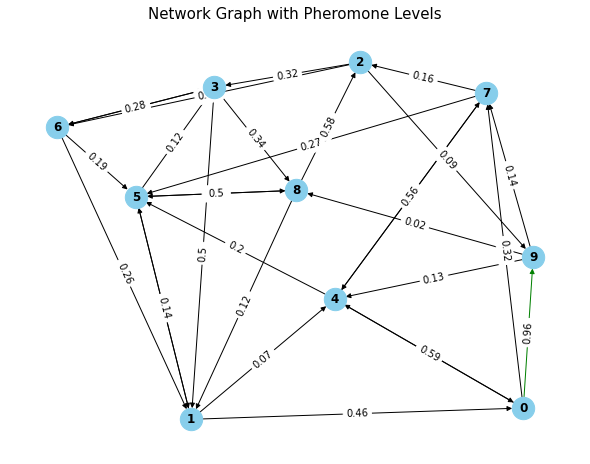


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [72 81 72 72 72 57 64 72 57 45]

Ant path: [0, 7, 5, 3, 6, 5, 8, 2, 6, 3, 6, 1, 0, 9], Number of hops: 13, Remaining energy: [64 72 64 57 72 45 45 64 51 40]


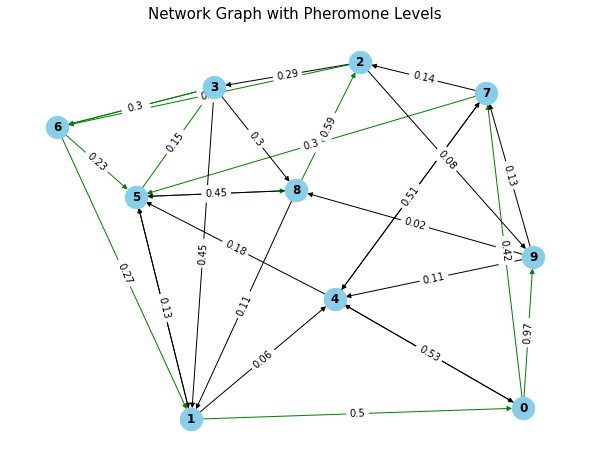


Hop Count: 13
Hopping Nodes: ['0 -> 7', '7 -> 5', '5 -> 3', '3 -> 6', '6 -> 5', '5 -> 8', '8 -> 2', '2 -> 6', '6 -> 3', '3 -> 6', '6 -> 1', '1 -> 0', '0 -> 9']
Energy Array: [64 72 64 57 72 45 45 64 51 40]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [64 72 64 57 72 45 45 64 51 36]


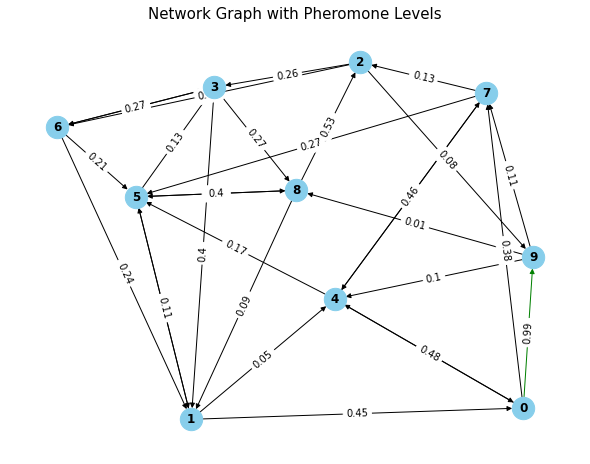


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [64 72 64 57 72 45 45 64 51 36]

Ant path: [0, 9], Number of hops: 1, Remaining energy: [64 72 64 57 72 45 45 64 51 32]


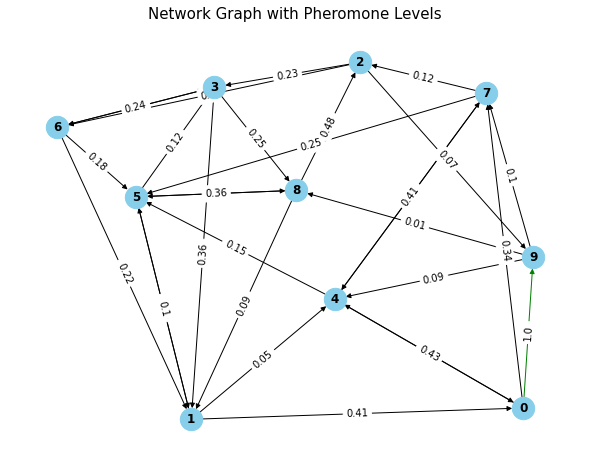


Hop Count: 1
Hopping Nodes: ['0 -> 9']
Energy Array: [64 72 64 57 72 45 45 64 51 32]


In [111]:
# Ant Colony Optimization algorithm with energy constraint (EEABR)
hop_counts_array_eeabr = []
def ant_colony_optimization_eeabr():
    global pheromone_levels_eeabr, energy_levels_eeabr
    energy_levels_eeabr = np.full(num_nodes, 100)
    
    G_eeabr = nx.DiGraph()
    for _ in range(num_ants):
        current_node = entry_node
        path = [current_node]
        while current_node != goal_node:
            probabilities = np.zeros(num_nodes)
            possible_moves = np.where(network[current_node] > 0)[0]
            valid_moves = [move for move in possible_moves if energy_levels_eeabr[move] > 10]  # Nodes with energy > 30
            
            # Avoid nodes with energy < 30
            valid_moves = [move for move in valid_moves if energy_levels_eeabr[move] >= 10]
            
            if not valid_moves:
                break
            
            for move in valid_moves:
                prob = (pheromone_levels_eeabr[current_node][move] ** alpha) * ((1.0 / network[current_node][move]) ** beta)
                probabilities[move] = prob if prob > 0 else 1e-10
            
            probabilities /= np.sum(probabilities)
            
            if np.isnan(probabilities).any() or np.sum(probabilities) == 0:
                break
            
            next_node = np.random.choice(valid_moves, p=probabilities[valid_moves])
            path.append(next_node)
            energy_levels_eeabr[next_node] *= 0.9
            current_node = next_node
        
        num_hops = len(path) - 1
        hop_counts_array_eeabr.append(num_hops)
        for i in range(num_hops):
            pheromone_levels_eeabr[path[i]][path[i+1]] += (1.0 / network[path[i]][path[i+1]])
        
        pheromone_levels_eeabr *= (1 - evaporation_rate)
        
        print(f"\nAnt path: {path}, Number of hops: {num_hops}, Remaining energy: {energy_levels_eeabr}")
        display_network_with_pheromones(G_eeabr, pheromone_levels_eeabr, path_taken=[(path[i], path[i+1]) for i in range(num_hops)])
        display_hopcount_and_energy(path, energy_levels_eeabr)
        
ant_colony_optimization_eeabr()

In [112]:
hop_counts_array_eeabr

[7, 1, 1, 26, 1, 1, 1, 13, 1, 1]

In [115]:
hop_counts_array_babr

[1, 6, 1, 4, 4, 12, 1, 4, 1, 37]

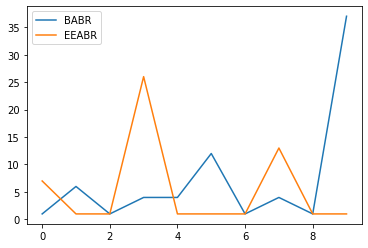

In [116]:
#plot hop_counts_array and hop_counts_array_eeabr in a linegraph
import matplotlib.pyplot as plt
plt.plot(hop_counts_array_babr, label='BABR')
plt.plot(hop_counts_array_eeabr, label='EEABR')
plt.legend()
plt.show()

In [125]:
#energy level metric

energy_array_1 = [100,100,100,100,100,100,100,100,100,90]
energy_array_2 = [81,100,100,100,81,100,100,90,100,81]
energy_array_3 = [81,100,100,100,81,100,100,90,100,72]
energy_array_4 = [72,100,100,100,72,100,100,81,100,64]
energy_array_5 = [64,100,100,100,64,100,100,72,100,57]
energy_array_6 = [51,90,90,90,57,90,90,57,90,51]
energy_array_7 = [45,72,81,81,51,90,81,51,81,40]
energy_array_8 = [36,64,64,64,51,72,64,51,72,40]
energy_array_9 = [28,51,51,64,40,51,51,32,51,32]
energy_array_10 = [21,51,45,51,40,45,45,32,45,32]

In [126]:
#write a for loop to sum over energies of each of these arrays and store them in another array energy_level_total
energy_level_total = []
energy_level_total.append(sum(energy_array_1))
energy_level_total.append(sum(energy_array_2))
energy_level_total.append(sum(energy_array_3))
energy_level_total.append(sum(energy_array_4))
energy_level_total.append(sum(energy_array_5))
energy_level_total.append(sum(energy_array_6))
energy_level_total.append(sum(energy_array_7))
energy_level_total.append(sum(energy_array_8))
energy_level_total.append(sum(energy_array_9))
energy_level_total.append(sum(energy_array_10))

energy_level_total

[990, 933, 924, 889, 857, 756, 673, 578, 451, 407]

In [123]:
energy_array_1 = [ 81,100,100,100,81,100,100,81,100,90]
energy_array_2 = [ 81,100,100,100,81,100,100,81,100,90]
energy_array_3 = [ 81,100,100,100,81,100,100,81,100,90]
energy_array_4 = [72,81,72,72,72,57,64,72,57,64]
energy_array_5 = [72,81,72,72,72,57,64,72,57,57]
energy_array_6 = [72,81,72,72,72,57,64,72,57,51]
energy_array_7 = [72,81,72,72,72,57,64,72,57,45]
energy_array_8 = [64,72,64,57,72,45,45,64,51,40]
energy_array_9 = [64,72,64,57,72,45,45,64,51,36]
energy_array_10 = [64,72,64,57,72,45,45,64,51,32]


In [124]:
energy_level_total_eeabr = []
energy_level_total_eeabr.append(sum(energy_array_1))
energy_level_total_eeabr.append(sum(energy_array_2))
energy_level_total_eeabr.append(sum(energy_array_3))
energy_level_total_eeabr.append(sum(energy_array_4))
energy_level_total_eeabr.append(sum(energy_array_5))
energy_level_total_eeabr.append(sum(energy_array_6))
energy_level_total_eeabr.append(sum(energy_array_7))
energy_level_total_eeabr.append(sum(energy_array_8))
energy_level_total_eeabr.append(sum(energy_array_9))
energy_level_total_eeabr.append(sum(energy_array_10))

energy_level_total_eeabr

[933, 933, 933, 683, 676, 670, 664, 574, 570, 566]

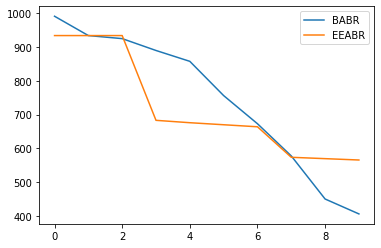

In [127]:
#plot line graph between energy_level_total and energy_level_total_eeabr
import matplotlib.pyplot as plt
plt.plot(energy_level_total, label='BABR')
plt.plot(energy_level_total_eeabr, label='EEABR')
plt.legend()
plt.show()
